
#### Kate Cough
#### Project One: Titanic
#### July 2017

## Summary

I have a dataset with information about passengers on the Titanic that includes the fare they paid and whether they survived the sinking; I would like to calculate the relationship between ticket price and the likelihood that one survived. 

I'm imagining the final product to look like this:

## Details

Possible headline(s): 
Passengers who paid higher fares more likely to survive sinking of Titanic

Paying for to survive: passengers who paid higher fare more likely to survive Titanic sinking

Data set(s): From the department of Biostats at Vanderbilt (http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets), using information from Encyclopedia Titanica (https://www.encyclopedia-titanica.org/)

Code repository: https://github.com/jsoma/sample-pages/tree/master/code/a-very-cool-project

Possible problems/fears/questions: Calculating probabilities 


## Work so far

I've cleaned the data a little and explored it. Made some charts relating to number of tickets sold and the fare passengers paid, looked a little at the age and sex columns, and made a scatter plot relating ticket price and survival. The end product I'm imagining to look like this:

**Data Dictionary**

survival: Survival	0 = No, 1 = Yes
pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex: Sex (male/female)	
Age: Age in years	
sibsp: # of siblings / spouses aboard the Titanic	
parch: # of parents / children aboard the Titanic	
ticket: Ticket number	
fare: Passenger fare	
cabin: Cabin number	
embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

source: https://www.kaggle.com/c/titanic/data

the data came from here: https://www.encyclopedia-titanica.org/

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/titanic_project_1/titanic3.csv')

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#could we create a dataframe with the value counts of
#the fare and merge that with the survivors?
# df['fare'].value_counts()

In [6]:
#what (column to group by), [what column you want info about], .what kind of info you want()
# df.groupby("Continent")["GDP_per_capita"].describe()
#let's look at this. groupby fare and get information on the survived column
# data[data['Type'].str.contains('Fruit')]

#let's groupby the fare and see the number of 
#people who survived for each fare (we can sum because the
#values are 0 and 1 so sum will give us the number
#of survivors)
fare_grouped = df.groupby('fare')['survived'].sum()
fare_grouped.head(30)

fare
0.0000    2
3.1708    1
4.0125    0
5.0000    0
6.2375    0
6.4375    0
6.4500    0
6.4958    0
6.7500    0
6.8583    0
6.9500    1
6.9750    1
7.0000    1
7.0458    0
7.0500    1
7.0542    0
7.1250    0
7.1417    1
7.2250    5
7.2292    7
7.2500    1
7.2833    0
7.3125    0
7.4958    1
7.5208    0
7.5500    2
7.5750    0
7.5792    1
7.6292    0
7.6500    3
Name: survived, dtype: int64

In [7]:
#turn this series into a dataframe 

fare_grouped = fare_grouped.to_frame('fare_grouped')


In [8]:
fare_grouped.head()

,fare_grouped
fare,
0.0000,2
3.1708,1
4.0125,0
5.0000,0
6.2375,0


In [9]:
#check to see if it worked
fare_grouped.head()

,fare_grouped
fare,
0.0000,2
3.1708,1
4.0125,0
5.0000,0
6.2375,0


In [10]:
#create a new column with the number of tickets purchased
#based on the value counts for the fare column in the OG df

fare_grouped['number_tickets_purchased'] = df['fare'].value_counts()
fare_grouped

,fare_grouped,number_tickets_purchased
fare,,
0.0000,2,17
3.1708,1,1
4.0125,0,1
5.0000,0,1
6.2375,0,1
6.4375,0,3
6.4500,0,1
6.4958,0,3
6.7500,0,2


In [11]:
fare_grouped=fare_grouped.reset_index()

In [12]:
fare_grouped

,fare,fare_grouped,number_tickets_purchased
0,0.0000,2,17
1,3.1708,1,1
2,4.0125,0,1
3,5.0000,0,1
4,6.2375,0,1
5,6.4375,0,3
6,6.4500,0,1
7,6.4958,0,3
8,6.7500,0,2
9,6.8583,0,1


In [13]:
#rename the columns immediately because otherwise
#it's confusing

fare_grouped.rename(columns={'fare_grouped':'number_survivors'}, inplace=True)
fare_grouped.head()

,fare,number_survivors,number_tickets_purchased
0,0.0000,2,17
1,3.1708,1,1
2,4.0125,0,1
3,5.0000,0,1
4,6.2375,0,1


In [14]:
fare_grouped.columns

Index(['fare', 'number_survivors', 'number_tickets_purchased'], dtype='object')

In [15]:
#create a new column with the survival rate
#by dividing the # of survivors
#by the # of people who purchased a ticket at 
#that fare survivors / number_tickets_purchased

fare_grouped['survival_%_rate'] = (fare_grouped['number_survivors']/fare_grouped['number_tickets_purchased']) * 100

In [16]:
fare_grouped.head(30)

,fare,number_survivors,number_tickets_purchased,survival_%_rate
0,0.0000,2,17,11.764706
1,3.1708,1,1,100.000000
2,4.0125,0,1,0.000000
3,5.0000,0,1,0.000000
4,6.2375,0,1,0.000000
5,6.4375,0,3,0.000000
6,6.4500,0,1,0.000000
7,6.4958,0,3,0.000000
8,6.7500,0,2,0.000000
9,6.8583,0,1,0.000000


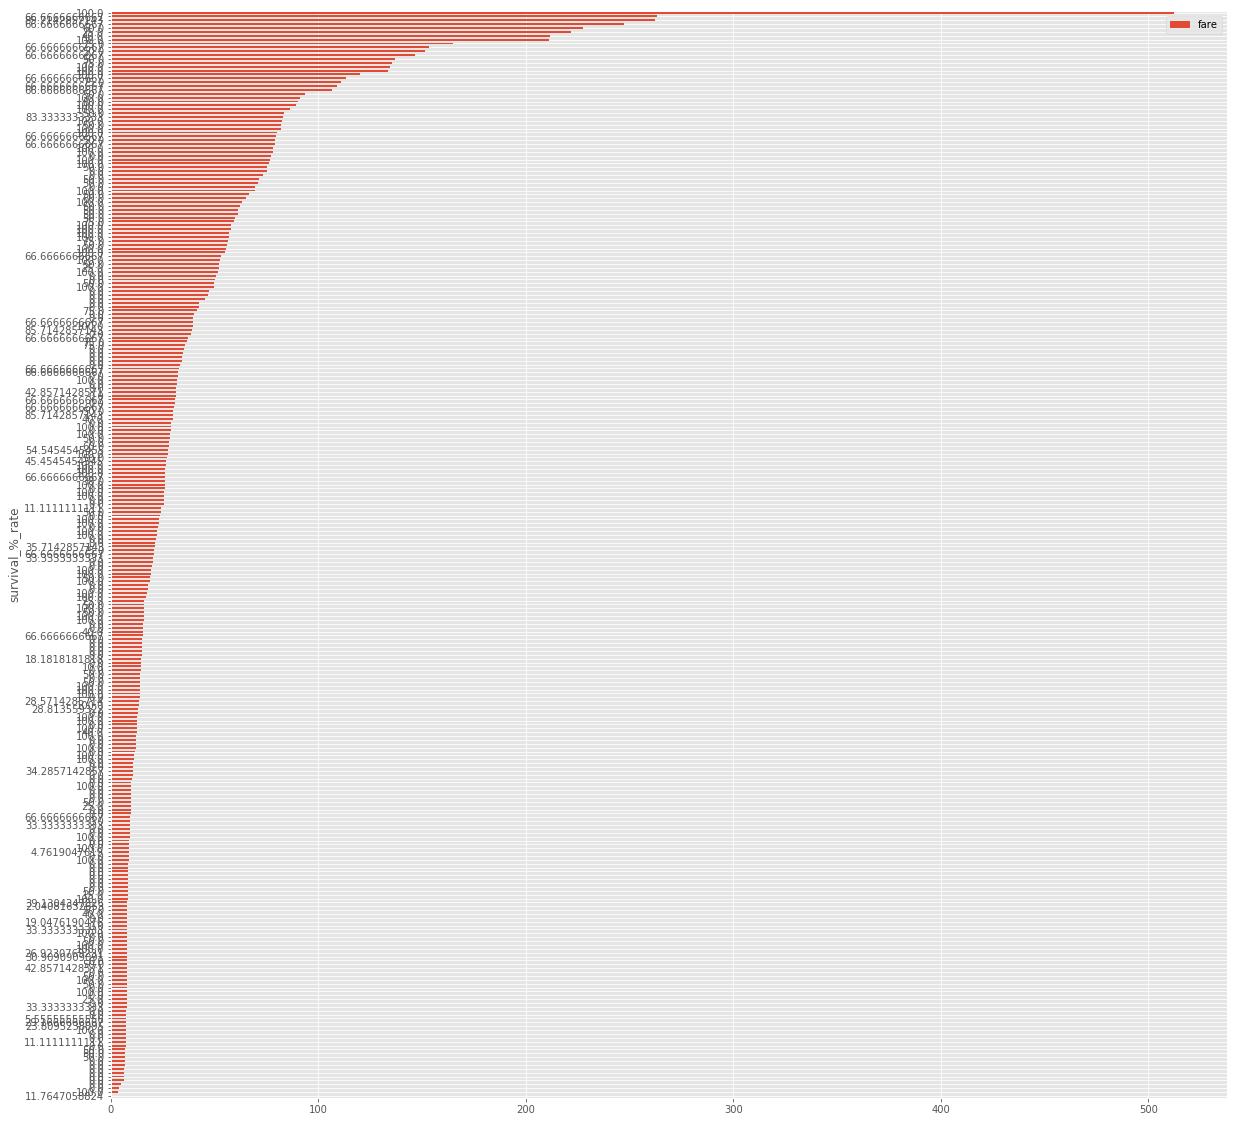

In [17]:
fare_grouped.plot(x='survival_%_rate', y='fare', kind='barh', figsize=(20,20))

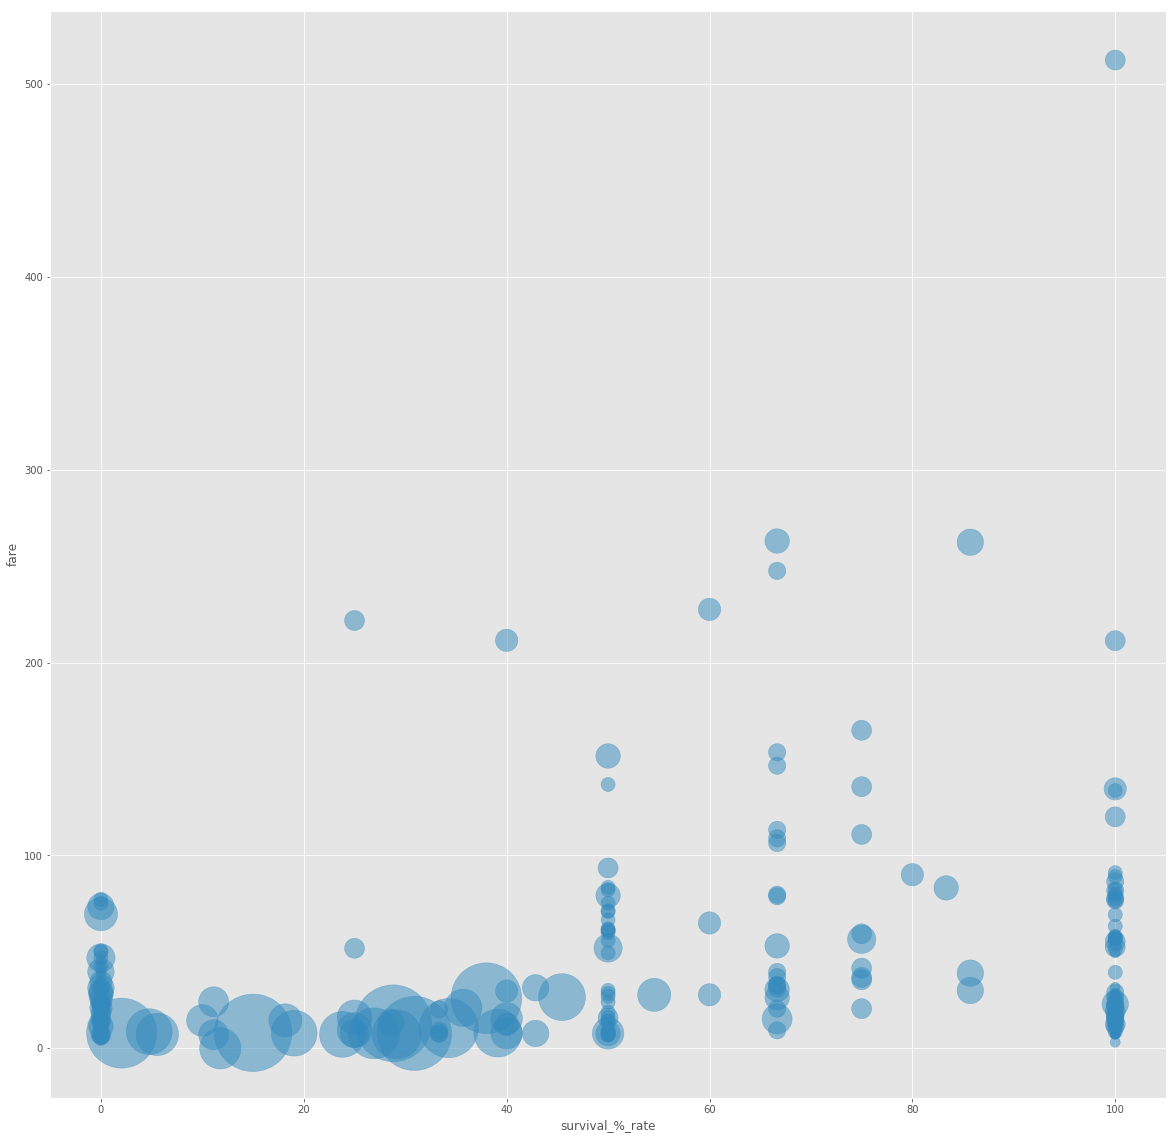

In [23]:
sizes = fare_grouped.apply(lambda row: row['number_tickets_purchased'] * 100, axis=1)

#this turns the circle size into the number of tickets purchased * 100


fare_grouped.plot(x='survival_%_rate', 
                  y='fare', 
                  kind='scatter', 
                  figsize=(20,20), 
                  alpha=0.5,
                  s=sizes)
plt.savefig('fare-grouped.pdf')

# plt.scatter(fare_grouped['survival_%_rate'], fare_grouped['fare'], alpha=0.5)



# .plot(x='GDP_per_capita', 
#         y='life_expectancy', 
#         kind='scatter', 
#         xlim=(0, 70000), 
#         ylim=(30,85), 
#         linewidth=0, 
#         figsize=(10,6))

# plt.savefig('boring-graph.pdf')

In [ ]:
fare_grouped.hist(figsize=(15,15))

In [ ]:
#This might help with markersize stuff:
#http://matplotlib.org/1.4.2/examples/pylab_examples/scatter_demo2.html

### Here's some interesting info on fare prices and how they were calculated for this dataset:
http://www.statisticalconsultants.co.nz/blog/titanic-fare-data.html

In [ ]:
ax = df['fare'].plot(figsize=(20,10), kind='hist', bins=100, title='Fares paid for passage on the Titanic')
ax.set_xlabel('fare in british pounds')
ax.set_ylabel('number of tickets sold')

In [ ]:
#what was the average age of passengers?
df['age'].describe()

In [ ]:
#how many men? women?
df['sex'].value_counts()

In [ ]:
#average fare price? max?
df['fare'].describe()

In [ ]:
#let's look at all of the different fares and how many people paid 
#each fare value. there are lots of random ones.
df['fare'].value_counts().sort_values(ascending=True)

In [ ]:
#let's try this: there are 50 people who paid
#26.0000 for a ticket.
# newdf = df[df['id'] == id]

twenty_six_pounds = df[df['fare'] == 26.0000]
twenty_six_pounds.head()


In [ ]:
#let's take a value counts on the survival column of 
#our new df

twenty_six_pounds['survived'].value_counts()

So out of 50 people who paid 26.0000 pounds, 19 survived and 31 perished.

In [ ]:
#to get the survival percentage rate,
#divide the number of survivors by the number
#of people paying that ticket price 
(19/50) * 100

In [ ]:
plt.scatter(df.fare, df.survived, alpha=0.5)

In [ ]:
df.plot(x='fare', y='survived', figsize=(20,10), kind='scatter')
